In [70]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

Stage of behavior prediction

In [2]:
data = pd.read_pickle('data/fitbit_ttm_to_model.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,Normal,Obese,Overweight,Underweight,below_30s,above_30s,True,False,FEMALE,MALE,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,stage
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,NaN,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,NaN,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,NaN,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,NaN,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,0.966667,-1.793898,1596.35,48.76235,5522.1,67.283493,122.0,4.0,32.0,800.0,NaN,56.371137,28920000.0,0.0,403.0,79.0,0.0,92.0,0.712644,1.067568,1.090196,0.684783,7231.0,41.0,1393.0,3.0,0.0,1,0,0,0,1,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Maintenance
3643,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,0.833333,-0.705708,1330.51,48.78266,660.4,60.454727,86.0,0.0,0.0,752.0,NaN,56.107319,36120000.0,0.0,497.0,105.0,0.0,91.0,0.732558,1.418919,1.285156,1.153846,1027.0,4.0,1386.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maintenance
3644,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,0.833333,-1.229213,1513.08,48.80683,1414.0,67.646174,148.0,9.0,8.0,724.0,NaN,56.007418,33060000.0,0.0,462.0,89

In [3]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

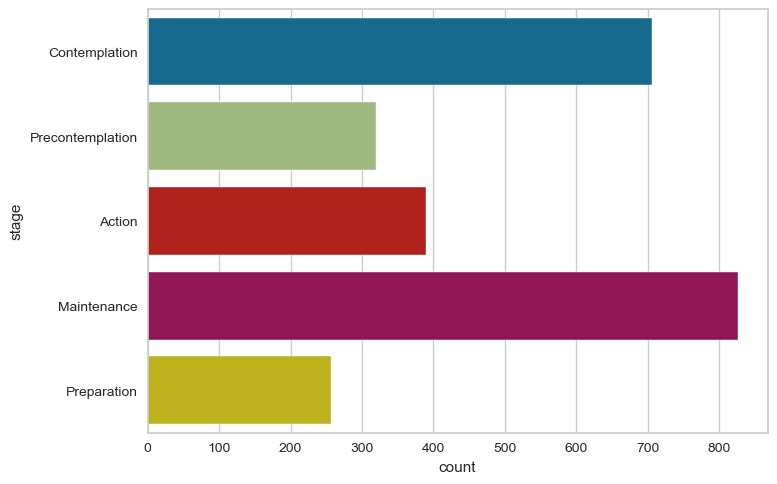

In [4]:
sns.countplot(y="stage", data=train_data)

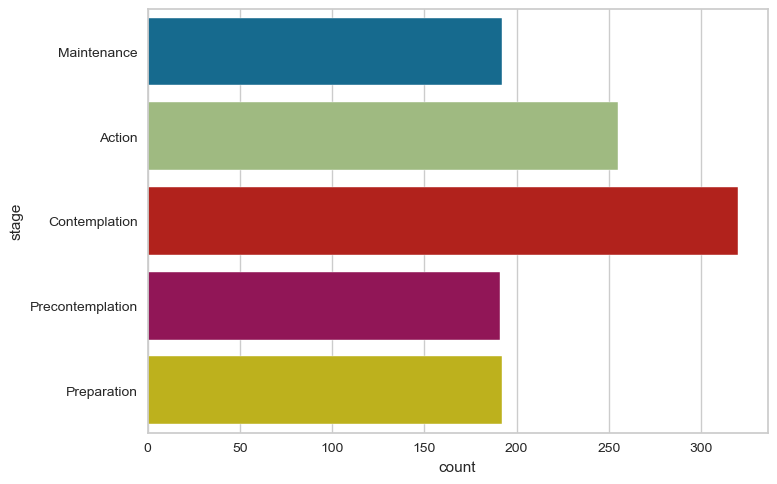

In [5]:
sns.countplot(y="stage", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,"Action: 0, Contemplation: 1, Maintenance: 2, Precontemplation: 3, Preparation: 4"
4,Original Data,"(2497, 55)"
5,Missing Values,True
6,Numeric Features,34
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3159,0.3974,0.2510,0.3008,0.2230,0.0531,0.0769,2.2467
et,Extra Trees Classifier,0.2779,0.4027,0.2350,0.4251,0.2687,0.1026,0.1189,0.1767
ada,Ada Boost Classifier,0.2547,0.3439,0.1888,0.3511,0.2675,0.0598,0.0699,0.1667
rf,Random Forest Classifier,0.2535,0.3848,0.2108,0.4159,0.2392,0.0778,0.0920,0.1933
lightgbm,Light Gradient Boosting Machine,0.2359,0.3318,0.1887,0.3372,0.2184,0.0602,0.0689,0.8333
gbc,Gradient Boosting Classifier,0.2335,0.3711,0.2212,0.4691,0.2265,0.0645,0.0774,2.4067
dummy,Dummy Classifier,0.2310,0.3333,0.2167,0.0653,0.1004,0.0000,0.0000,0.0300
dt,Decision Tree Classifier,0.2247,0.3510,0.2285,0.4062,0.2267,0.0678,0.0786,0.0567
knn,K Neighbors Classifier,0.2239,0.3479,0.2166,0.3348,0.2192,0.0279,0.0353,1.1800
ridge,Ridge Classifier,0.2199,0.0000,0.1638,0.3586,0.2128,0.0193,0.0233,0.0333


In [9]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

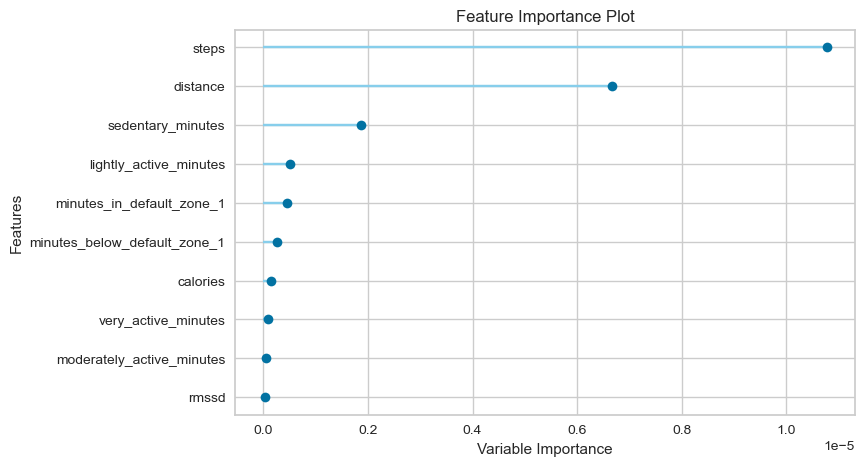

In [10]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [11]:
data = pd.read_pickle('data/fitbit_breq_to_model.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,breq_self_determination
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,intrinsic_regulation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,identified_regulation
3579,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,identified_regulation
3580,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,identified_regulation
3581,621e339967b776a240e502de,2022-01-16,34.406884,51.533,45.322,94.5,11.6,73.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,identified_regulation


In [12]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

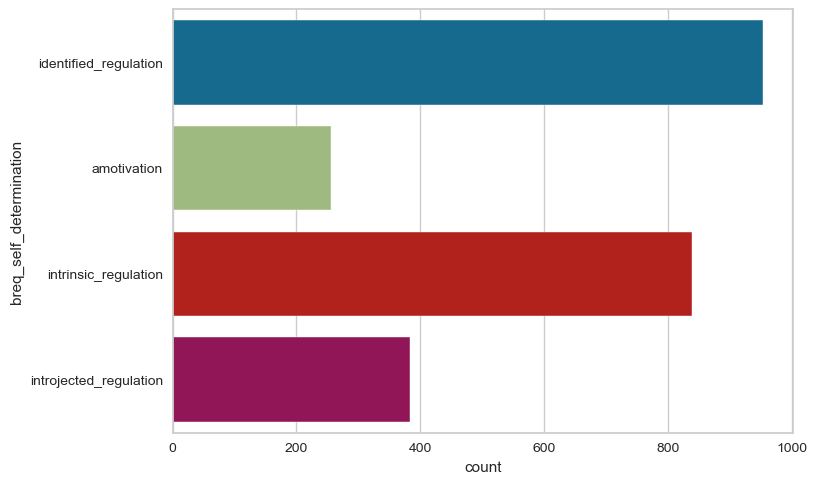

In [13]:
sns.countplot(y="breq_self_determination", data=train_data)

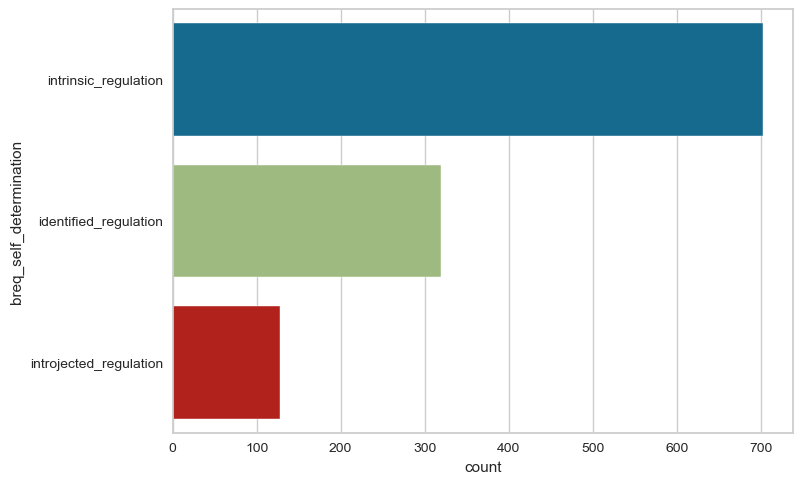

In [14]:
sns.countplot(y="breq_self_determination", data=test_data)

In [15]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [16]:
s = setup(data=train_data, target='breq_self_determination', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,breq_self_determination
2,Target Type,Multiclass
3,Label Encoded,"amotivation: 0, identified_regulation: 1, intrinsic_regulation: 2, introjected_regulation: 3"
4,Original Data,"(2433, 55)"
5,Missing Values,True
6,Numeric Features,34
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.4744,0.0000,0.2500,0.2297,0.3082,0.0000,0.0000,0.0767
lightgbm,Light Gradient Boosting Machine,0.4579,0.6903,0.4433,0.5122,0.4601,0.2260,0.2376,0.6633
rf,Random Forest Classifier,0.4311,0.6190,0.4368,0.4554,0.4120,0.1816,0.1925,0.2000
et,Extra Trees Classifier,0.4307,0.6498,0.4316,0.4607,0.4123,0.1847,0.1949,0.1767
dt,Decision Tree Classifier,0.4112,0.5848,0.4039,0.4480,0.4087,0.1667,0.1774,0.0367
gbc,Gradient Boosting Classifier,0.4080,0.6527,0.3804,0.4852,0.4157,0.1500,0.1640,1.6833
ada,Ada Boost Classifier,0.3415,0.6197,0.3800,0.3868,0.3325,0.1056,0.0935,0.1667
lda,Linear Discriminant Analysis,0.3348,0.5362,0.3155,0.3867,0.3396,0.0530,0.0562,0.0433
ridge,Ridge Classifier,0.3328,0.0000,0.2779,0.3668,0.3273,0.0190,0.0197,0.0333
knn,K Neighbors Classifier,0.3189,0.5190,0.2845,0.3581,0.3136,0.0248,0.0240,0.0733


In [18]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

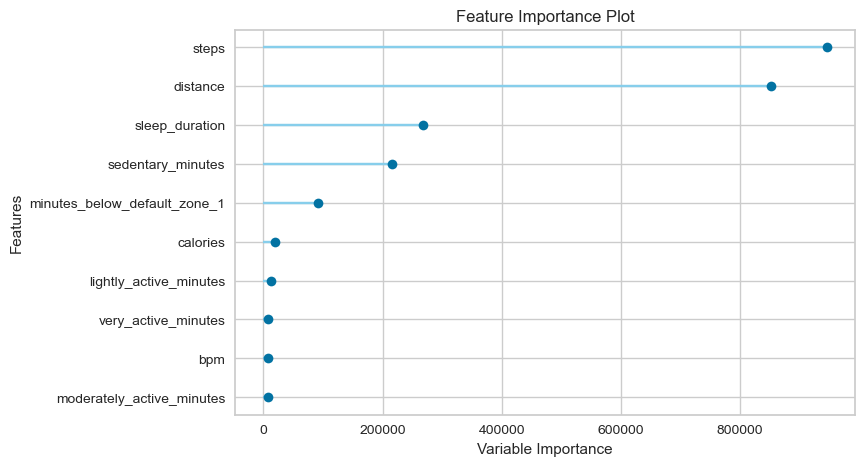

In [19]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [43]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Treadmill,Walk,Weights,Workout,Yoga/Pilates,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,0.0,1.0,0.0,0.0,0.0,LOW,LOW,HIGH,HIGH,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,2022-01-13,33.816660,51.760,47.281,96.7,11.6,79.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3451,621e339967b776a240e502de,2022-01-14,34.460723,51.351,45.883,95.7,12.0,79.0,0.766667,0.775,...,NaN,NaN,NaN,NaN,NaN,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3452,621e339967b776a240e502de,2022-01-15,34.137341,50.504,49.779,95.7,12.0,78.0,0.833333,0.700,...,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3453,621e339967b776a240e502de,2022-01-16,34.406884,51.533,45.322,94.5,11.6,73.0,0.700000,0.725,...,0.0,0.0,0.0,0.0,0.0,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE


predict extraversion

In [24]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

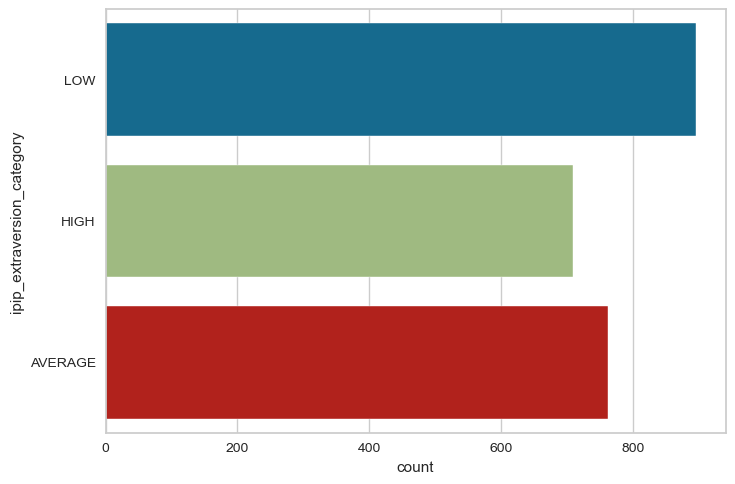

In [25]:
sns.countplot(y="ipip_extraversion_category", data=train_data)

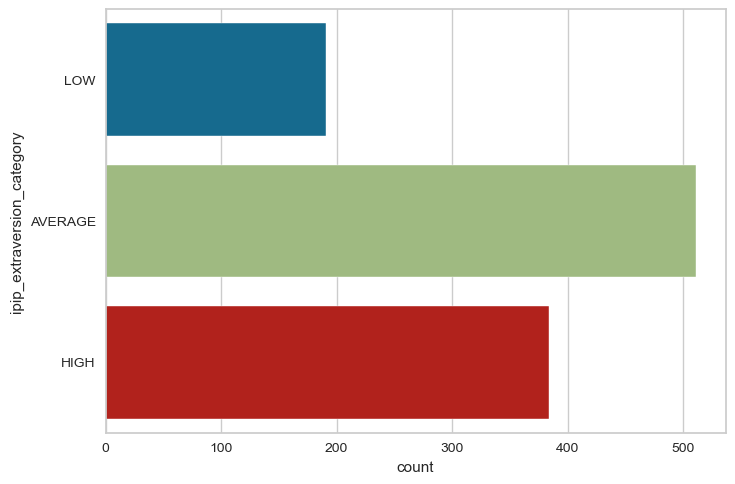

In [26]:
sns.countplot(y="ipip_extraversion_category", data=test_data)

In [27]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [28]:
s = setup(data=train_data, target='ipip_extraversion_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 55)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4903,0.6269,0.4987,0.5377,0.4847,0.2439,0.2570,0.2667
gbc,Gradient Boosting Classifier,0.4498,0.6033,0.4644,0.5055,0.4410,0.1944,0.2092,1.3833
ada,Ada Boost Classifier,0.4221,0.6298,0.4219,0.4782,0.4246,0.1437,0.1531,0.1567
rf,Random Forest Classifier,0.4116,0.5981,0.4147,0.4886,0.4176,0.1386,0.1519,0.2300
svm,SVM - Linear Kernel,0.4044,0.0000,0.3333,0.1666,0.2351,0.0000,0.0000,0.0833
dt,Decision Tree Classifier,0.4033,0.5613,0.4120,0.4482,0.4074,0.1120,0.1175,0.0367
nb,Naive Bayes,0.3727,0.5056,0.3637,0.3805,0.3516,0.0598,0.0636,0.0333
et,Extra Trees Classifier,0.3678,0.5903,0.3693,0.4064,0.3617,0.0679,0.0731,0.2133
lda,Linear Discriminant Analysis,0.3422,0.4810,0.3313,0.3725,0.3504,0.0018,0.0023,0.0467
qda,Quadratic Discriminant Analysis,0.3401,0.5191,0.3368,0.4055,0.3216,0.0144,0.0196,0.0833


In [30]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

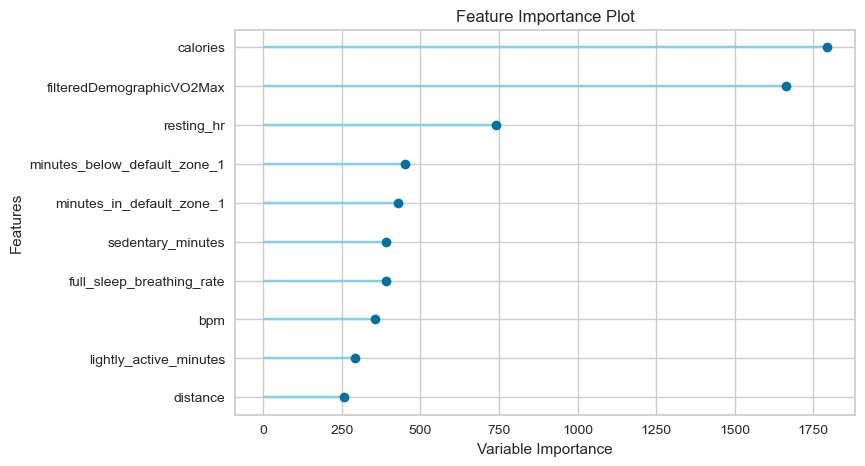

In [32]:
plot_model(best, plot='feature')

predict agreeableness

In [ ]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [35]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

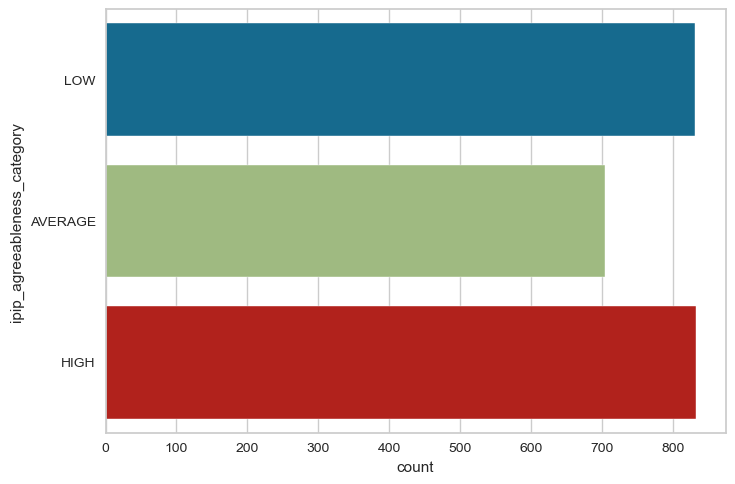

In [36]:
sns.countplot(y="ipip_agreeableness_category", data=train_data)

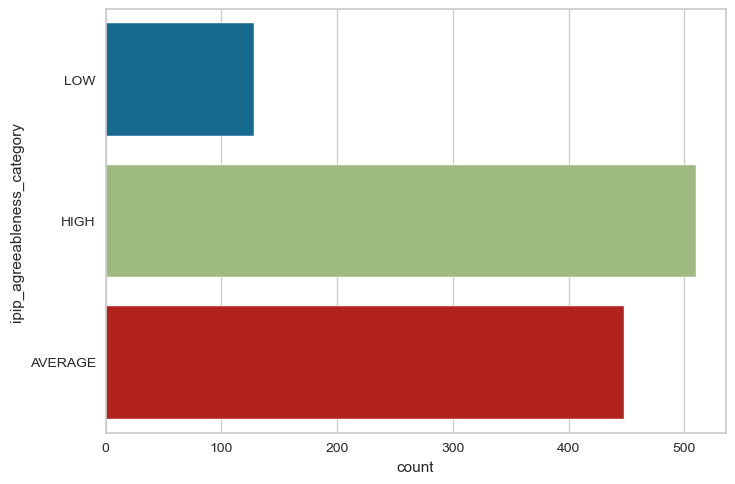

In [37]:
sns.countplot(y="ipip_agreeableness_category", data=test_data)

In [38]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [39]:
s = setup(data=train_data, target='ipip_agreeableness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 55)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4156,0.5835,0.4124,0.4244,0.4071,0.1269,0.1323,0.2133
lightgbm,Light Gradient Boosting Machine,0.4135,0.5958,0.4029,0.4389,0.4164,0.1169,0.1202,0.6933
dt,Decision Tree Classifier,0.3993,0.5531,0.3837,0.4006,0.3920,0.0986,0.0999,0.0367
gbc,Gradient Boosting Classifier,0.3894,0.5786,0.3719,0.3991,0.3886,0.0758,0.0774,1.5967
et,Extra Trees Classifier,0.3732,0.5679,0.3562,0.3830,0.3691,0.0614,0.0637,0.2200
rf,Random Forest Classifier,0.3625,0.5475,0.3414,0.3950,0.3666,0.0452,0.0468,0.2400
lda,Linear Discriminant Analysis,0.3324,0.5054,0.3240,0.3581,0.3138,-0.0079,-0.0074,0.0533
qda,Quadratic Discriminant Analysis,0.3152,0.4717,0.2927,0.3166,0.2874,-0.0549,-0.0603,0.0900
ridge,Ridge Classifier,0.3139,0.0000,0.3118,0.3438,0.2960,-0.0275,-0.0291,0.0333
knn,K Neighbors Classifier,0.3127,0.4960,0.3162,0.3613,0.3143,-0.0169,-0.0152,0.0800


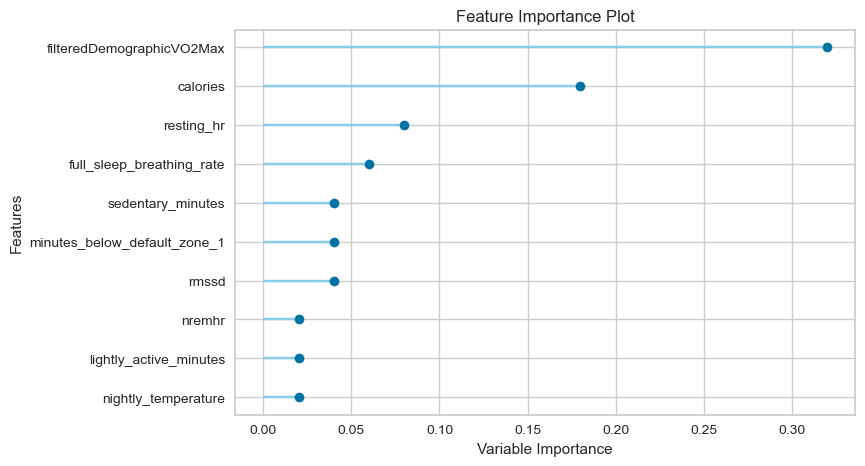

In [41]:
plot_model(best, plot='feature')

predict conscientiousness

In [71]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [72]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

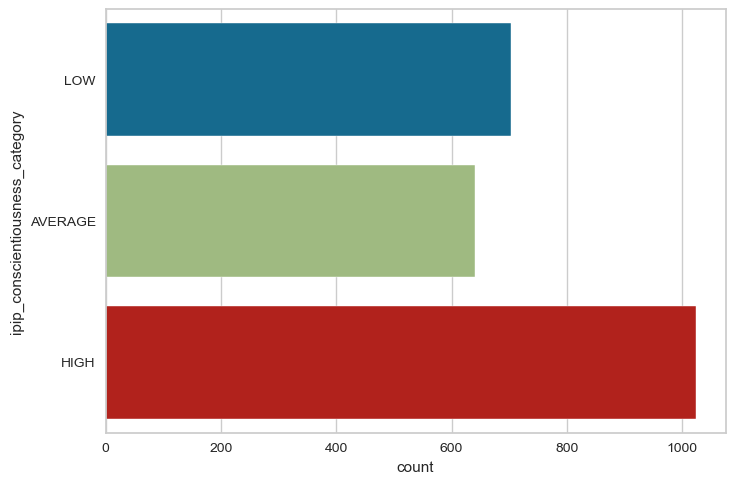

In [73]:
sns.countplot(y="ipip_conscientiousness_category", data=train_data)

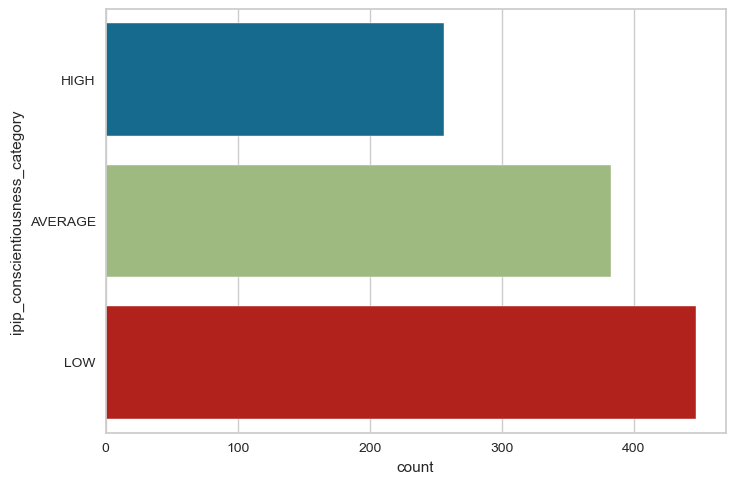

In [74]:
sns.countplot(y="ipip_conscientiousness_category", data=test_data)

In [75]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [76]:
s = setup(data=train_data, target='ipip_conscientiousness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 55)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4334,0.5000,0.3333,0.1902,0.2637,0.0000,0.0000,0.0133
lr,Logistic Regression,0.4197,0.5237,0.3255,0.2027,0.2658,-0.0140,-0.0250,1.9267
knn,K Neighbors Classifier,0.3879,0.5524,0.3854,0.4107,0.3800,0.0766,0.0803,1.1033
et,Extra Trees Classifier,0.3852,0.6001,0.3777,0.4624,0.3783,0.0988,0.1089,0.2033
svm,SVM - Linear Kernel,0.3818,0.0000,0.3333,0.1582,0.2208,0.0000,0.0000,0.0633
lda,Linear Discriminant Analysis,0.3814,0.5958,0.3670,0.4423,0.3749,0.1023,0.1159,0.0367
rf,Random Forest Classifier,0.3796,0.6160,0.3923,0.4756,0.3796,0.0985,0.1091,0.2100
ridge,Ridge Classifier,0.3707,0.0000,0.3497,0.4193,0.3641,0.0822,0.0917,0.0267
gbc,Gradient Boosting Classifier,0.3680,0.5461,0.3590,0.4643,0.3781,0.0802,0.0848,1.7000
lightgbm,Light Gradient Boosting Machine,0.3544,0.5426,0.3486,0.4861,0.3770,0.0725,0.0824,0.6800


In [78]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
plot_model(best, plot='feature')

predict stability

In [80]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [81]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

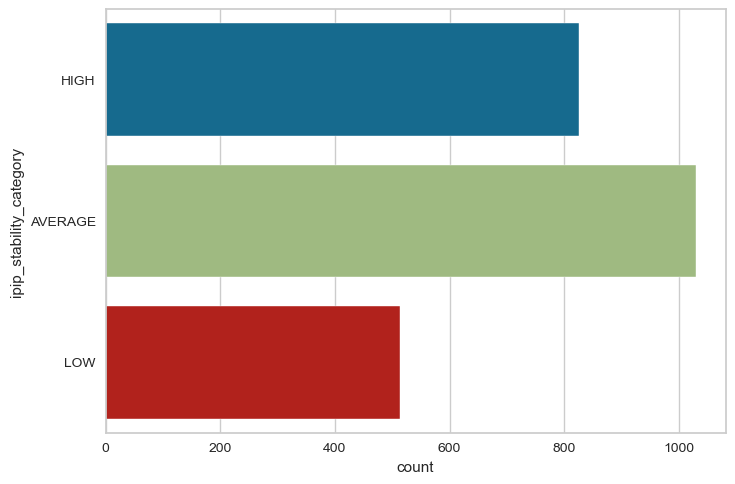

In [82]:
sns.countplot(y="ipip_stability_category", data=train_data)

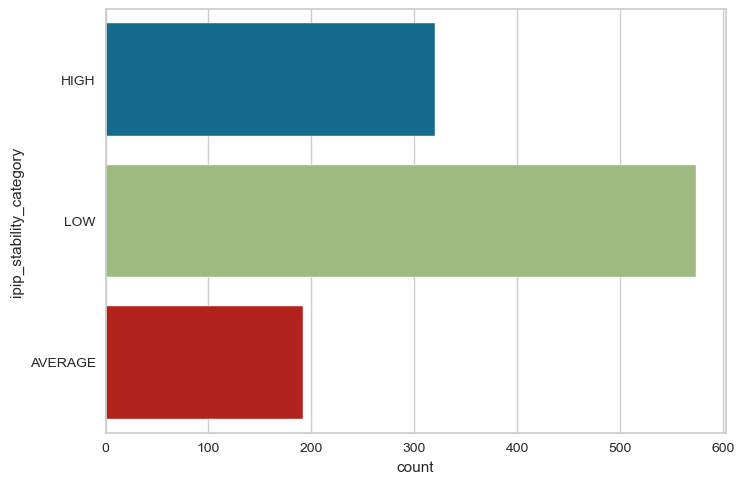

In [83]:
sns.countplot(y="ipip_stability_category", data=test_data)

In [84]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [85]:
s = setup(data=train_data, target='ipip_stability_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 55)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [86]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4338,0.5000,0.3333,0.1935,0.2662,0.0000,0.0000,0.0133
lr,Logistic Regression,0.3680,0.4444,0.3211,0.2268,0.2719,-0.0324,-0.0378,0.0867
knn,K Neighbors Classifier,0.3634,0.4921,0.3262,0.3574,0.3231,-0.0103,-0.0035,0.0767
qda,Quadratic Discriminant Analysis,0.3567,0.5053,0.3402,0.3175,0.2840,0.0125,0.0095,0.0600
ridge,Ridge Classifier,0.3028,0.0000,0.2770,0.3159,0.2841,-0.1011,-0.1040,0.0200
svm,SVM - Linear Kernel,0.3008,0.0000,0.3333,0.1117,0.1574,0.0000,0.0000,0.0533
ada,Ada Boost Classifier,0.2927,0.3879,0.2587,0.3234,0.2743,-0.0912,-0.0961,0.1300
lda,Linear Discriminant Analysis,0.2923,0.4277,0.2685,0.3101,0.2811,-0.1098,-0.1134,0.0267
rf,Random Forest Classifier,0.2839,0.3902,0.2950,0.2875,0.2605,-0.0917,-0.1008,0.1733
et,Extra Trees Classifier,0.2779,0.4045,0.2830,0.2765,0.2479,-0.0996,-0.1116,0.1733


In [87]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
plot_model(best, plot='feature')

predict intellect

In [89]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [90]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

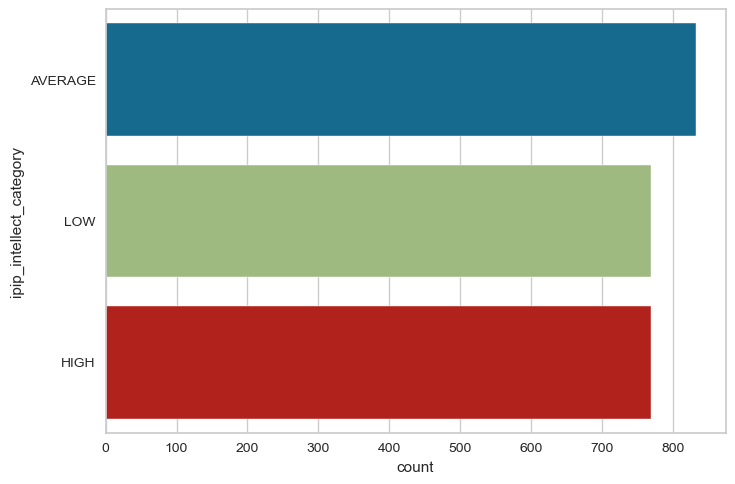

In [91]:
sns.countplot(y="ipip_intellect_category", data=train_data)

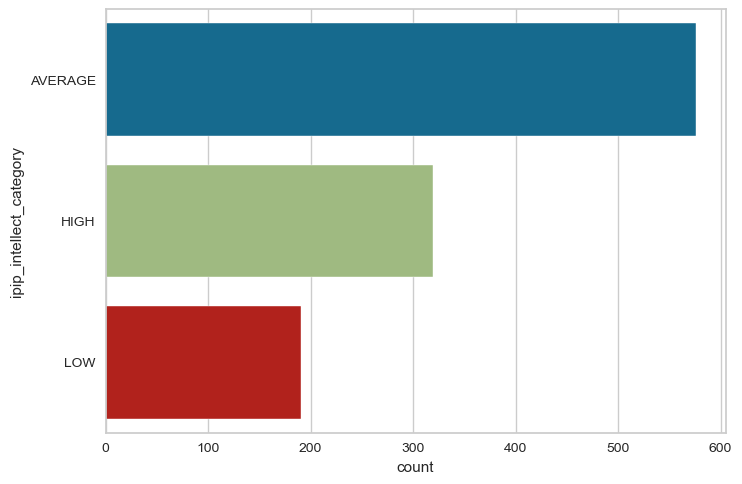

In [92]:
sns.countplot(y="ipip_intellect_category", data=test_data)

In [93]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [94]:
s = setup(data=train_data, target='ipip_intellect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 55)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [95]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4425,0.5667,0.4119,0.4376,0.4102,0.1242,0.1343,0.0567
rf,Random Forest Classifier,0.4395,0.5914,0.4298,0.5049,0.4436,0.1562,0.1673,0.1633
gbc,Gradient Boosting Classifier,0.4364,0.6032,0.4424,0.5170,0.4415,0.1610,0.1776,1.1633
lightgbm,Light Gradient Boosting Machine,0.4279,0.6159,0.4237,0.5061,0.4389,0.1496,0.1629,0.4400
et,Extra Trees Classifier,0.4095,0.6048,0.3986,0.4687,0.4108,0.1119,0.1217,0.1600
ada,Ada Boost Classifier,0.4005,0.5942,0.4015,0.4394,0.3836,0.1112,0.1295,0.1267
dt,Decision Tree Classifier,0.3899,0.5449,0.3630,0.4150,0.3850,0.0680,0.0727,0.0233
lda,Linear Discriminant Analysis,0.3831,0.5142,0.3721,0.4221,0.3777,0.0675,0.0737,0.0300
ridge,Ridge Classifier,0.3645,0.0000,0.3587,0.4067,0.3642,0.0460,0.0502,0.0167
knn,K Neighbors Classifier,0.3373,0.4977,0.3305,0.3763,0.3309,0.0046,0.0057,0.1867


In [96]:
best

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
plot_model(best, plot='feature')

Stai stress category prediction

In [98]:
data = pd.read_pickle('data/fitbit_stai_to_model.pkl')
data

,id,date,stai_stress,stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,45.0,Below average,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-06-07,46.0,Average,34.476865,56.57,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-07-19,46.0,Average,34.254286,57.33,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-07-26,46.0,Average,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-06-28,54.0,Above average,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,621e339967b776a240e502de,2021-11-22,49.0,Average,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,621e339967b776a240e502de,2021-12-06,51.0,Above average,34.674633,51.192,49.232,96.2,12.2,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276,621e339967b776a240e502de,2021-12-14,45.0,Below average,34.303759,46.311,56.468,96.5,11.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
277,621e339967b776a240e502de,2021-12-20,48.0,Average,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
cols = list(data.columns)
removed_ele = ['id', 'date', 'stai_stress_category']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    data[column] = pd.to_numeric(data[column])

In [100]:
data = data.drop(columns=['stai_stress', 'date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

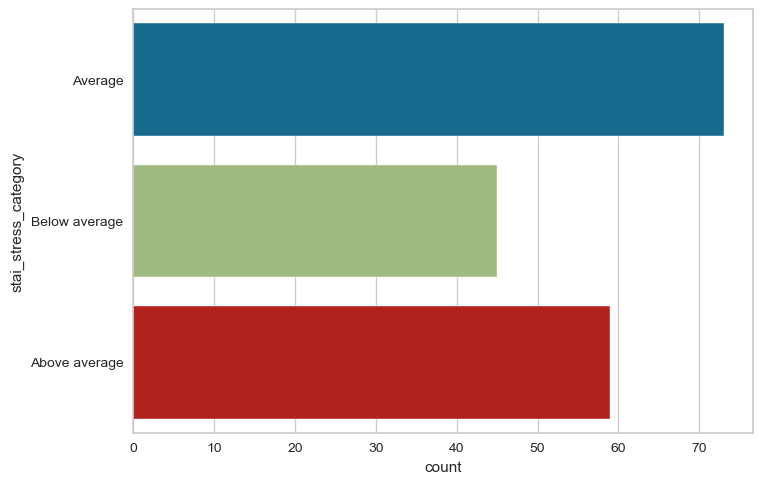

In [101]:
sns.countplot(y="stai_stress_category", data=train_data)

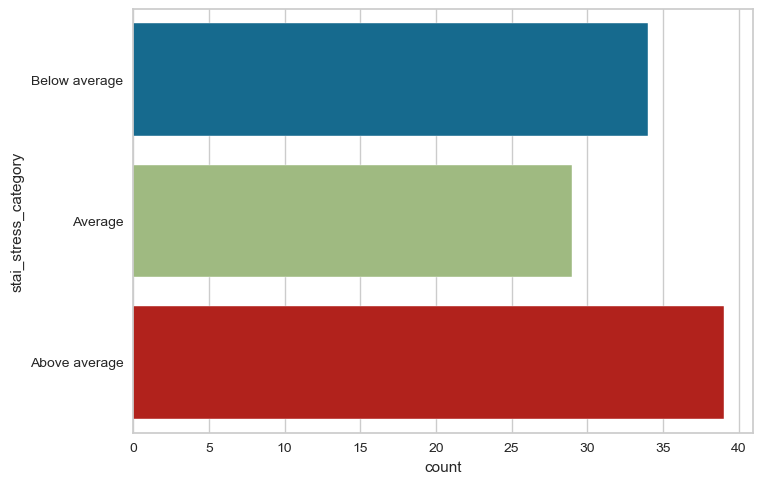

In [102]:
sns.countplot(y="stai_stress_category", data=test_data)

In [103]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [104]:
s = setup(data=train_data, target='stai_stress_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(177, 55)"
5,Missing Values,True
6,Numeric Features,30
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


In [105]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4407,0.5646,0.3967,0.4195,0.4027,0.1251,0.1350,0.0700
lr,Logistic Regression,0.4294,0.4771,0.3911,0.3335,0.3316,0.0881,0.1112,0.0267
ada,Ada Boost Classifier,0.4237,0.4868,0.3553,0.3777,0.3731,0.0610,0.0664,0.0467
nb,Naive Bayes,0.4068,0.5118,0.3574,0.3616,0.3736,0.0607,0.0668,0.0067
lightgbm,Light Gradient Boosting Machine,0.4011,0.5212,0.3784,0.4398,0.3962,0.0898,0.0995,0.2100
gbc,Gradient Boosting Classifier,0.3955,0.5278,0.3687,0.4238,0.3824,0.0740,0.0844,0.1533
et,Extra Trees Classifier,0.3955,0.4986,0.3583,0.4698,0.3874,0.0689,0.0870,0.0967
ridge,Ridge Classifier,0.3672,0.0000,0.3522,0.3914,0.3605,0.0501,0.0523,0.0067
dt,Decision Tree Classifier,0.3616,0.5242,0.3376,0.4058,0.3710,0.0341,0.0360,0.0067
rf,Random Forest Classifier,0.3616,0.5342,0.3382,0.4553,0.3339,0.0246,0.0569,0.1100


In [106]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
plot_model(best, plot='feature')

Panas negative affect prediction

In [108]:
from pycaret.regression import *

In [109]:
data = pd.read_pickle('data/fitbit_panas_to_model.pkl')
data

,id,date,positive_affect_score,negative_affect_score,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-07-26,37,14,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-05-31,38,12,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-06-07,37,12,34.476865,56.57,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-06-28,31,12,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-07-19,37,12,34.254286,57.33,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,2021-12-20,44,13,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,621e339967b776a240e502de,2021-12-27,45,11,35.107574,54.325,47.929,95.4,12.2,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
265,621e339967b776a240e502de,2022-01-03,44,11,34.957428,52.81,47.801,94.9,12.4,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
266,621e339967b776a240e502de,2022-01-12,45,13,34.073346,51.364,51.324,96.1,12.2,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [110]:
cols = list(data.columns)
removed_ele = ['id', 'date']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    data[column] = pd.to_numeric(data[column])

In [111]:
data = data.drop(columns=['positive_affect_score', 'date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [112]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [113]:
s = setup(data=train_data, target='negative_affect_score', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_affect_score
2,Original Data,"(166, 55)"
3,Missing Values,True
4,Numeric Features,30
5,Categorical Features,24
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(166, 78)"


In [114]:
best = compare_models(errors="raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,7.0180,67.9377,8.1874,-0.1611,0.3706,0.3776,0.0067
dummy,Dummy Regressor,7.0180,67.9377,8.1874,-0.1611,0.3706,0.3776,0.0067
et,Extra Trees Regressor,7.0179,70.8148,8.3803,-0.2296,0.3787,0.3710,0.0900
knn,K Neighbors Regressor,7.0755,73.9972,8.5961,-0.3099,0.3866,0.3671,0.0100
rf,Random Forest Regressor,7.2418,75.6221,8.6735,-0.3169,0.3893,0.3760,0.1133
lightgbm,Light Gradient Boosting Machine,7.2705,77.8177,8.7892,-0.3822,0.3979,0.3840,0.0167
br,Bayesian Ridge,7.3463,80.5692,8.9624,-0.4126,0.3997,0.3766,0.0100
ada,AdaBoost Regressor,7.5338,84.0693,9.1508,-0.4722,0.4107,0.3985,0.0400
huber,Huber Regressor,7.7593,89.2618,9.4233,-0.5642,0.4355,0.3780,0.0133
gbr,Gradient Boosting Regressor,7.7189,89.3301,9.4374,-0.5903,0.4251,0.3917,0.0467


In [115]:
best

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=123, verbose=False)

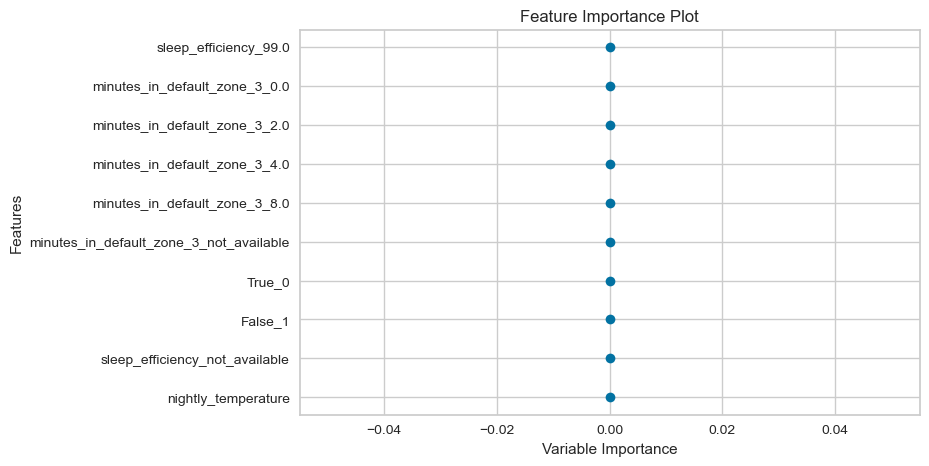

In [116]:
plot_model(best, plot='feature')

Panas positive affect prediction

In [117]:
data = pd.read_pickle('data/fitbit_panas_to_model.pkl')
data

,id,date,positive_affect_score,negative_affect_score,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-07-26,37,14,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-05-31,38,12,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-06-07,37,12,34.476865,56.57,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-06-28,31,12,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-07-19,37,12,34.254286,57.33,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,2021-12-20,44,13,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,621e339967b776a240e502de,2021-12-27,45,11,35.107574,54.325,47.929,95.4,12.2,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
265,621e339967b776a240e502de,2022-01-03,44,11,34.957428,52.81,47.801,94.9,12.4,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
266,621e339967b776a240e502de,2022-01-12,45,13,34.073346,51.364,51.324,96.1,12.2,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [118]:
cols = list(data.columns)
removed_ele = ['id', 'date']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    data[column] = pd.to_numeric(data[column])

In [119]:
data = data.drop(columns=['negative_affect_score', 'date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [120]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [121]:
s = setup(data=train_data, target='positive_affect_score', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,positive_affect_score
2,Original Data,"(166, 55)"
3,Missing Values,True
4,Numeric Features,30
5,Categorical Features,24
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(166, 78)"


In [122]:
best = compare_models(errors="raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,6.0982,60.6238,7.7681,-0.0673,0.2569,0.2189,0.0067
dummy,Dummy Regressor,6.0982,60.6238,7.7681,-0.0673,0.2569,0.2189,0.0067
br,Bayesian Ridge,6.3031,67.5314,8.1941,-0.1954,0.2695,0.2308,0.0133
rf,Random Forest Regressor,6.3254,68.4975,8.2651,-0.2228,0.2700,0.2304,0.1400
knn,K Neighbors Regressor,6.5297,69.0657,8.3090,-0.2297,0.2712,0.2333,0.0100
et,Extra Trees Regressor,6.5270,72.0043,8.4779,-0.2794,0.2718,0.2327,0.1167
ada,AdaBoost Regressor,6.5833,73.7272,8.5407,-0.3208,0.2778,0.2417,0.0533
lightgbm,Light Gradient Boosting Machine,6.5561,76.0061,8.7179,-0.3545,0.2876,0.2397,0.0200
gbr,Gradient Boosting Regressor,6.7441,74.9190,8.6073,-0.3557,0.2800,0.2475,0.0467
huber,Huber Regressor,7.4642,86.6643,9.3032,-0.5355,0.2996,0.2604,0.0133


In [123]:
best

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=123, verbose=False)

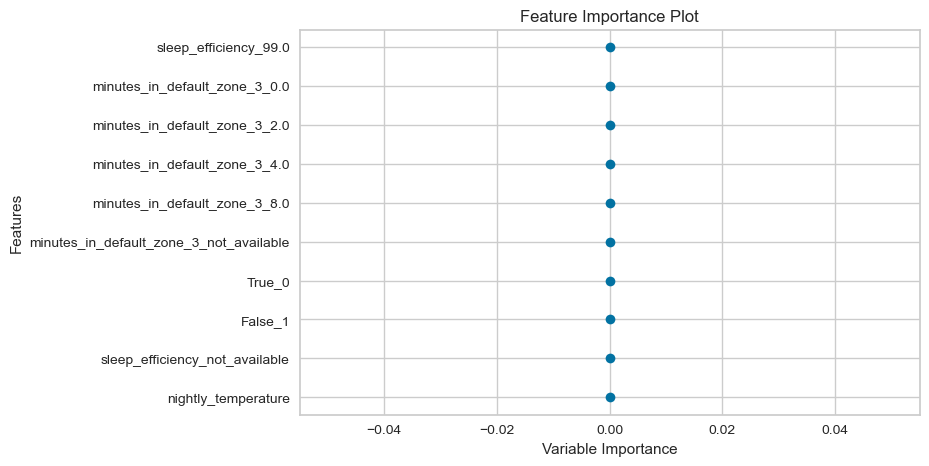

In [124]:
plot_model(best, plot='feature')